In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(p):
    """f(x, y, z, ...) = (x+1)^2 + (y-1)^2 + (z-2)^2 + ...
    p is a numpy array of any dimension."""
    return np.sum((p - np.array([[-1], [1], [2], np.zeros(len(p)-3)])[:len(p)])**2)

def f(p):
    """f(p) = (p[0]+1)^2 + (p[1]-1)^2 + (p[2]-2)^2 + sum of p[i]^2 for i >= 3"""
    shift = np.array([-1.0, 1.0, 2.0] + [0.0]*(len(p)-3))
    return np.sum((p - shift)**2)

def grad_f(p):
    """Gradient of f at point p (dimension-agnostic)"""
    shift = np.array([-1.0, 1.0, 2.0] + [0.0]*(len(p)-3))
    return 2 * (p - shift)

p = np.array([5.0, -3.0, 4.0])
alpha = 0.01
eps = 1e-6
max_iters = 10000

print(f"\nInitial point: p = {p}")
print(f"Initial loss: f(p) = {f(p):.6f}")
print(f"Learning rate: alpha = {alpha}")
print(f"Convergence threshold: eps = {eps}")
print(f"Expected minimum at: p = [-1, 1, 2]\n")

losses = []
for i in range(max_iters):
    grad = grad_f(p)
    step = alpha * grad
    p = p - step
    loss = f(p)
    losses.append(loss)
    
    if np.linalg.norm(step) < eps:
        print(f"\nConverged at iteration {i}")
        break
    
    print(f"Iter {i:5d}: loss = {loss:.6f}, ||p - optimum|| = {np.linalg.norm(p - np.array([-1, 1, 2])):.6f}")

print(f"\nFinal point: p = {p}")
print(f"Final loss: f(p) = {f(p):.10f}")
print(f"Distance to optimum (-1, 1, 2): {np.linalg.norm(p - np.array([-1, 1, 2])):.10f}")


Initial point: p = [ 5. -3.  4.]
Initial loss: f(p) = 56.000000
Learning rate: alpha = 0.01
Convergence threshold: eps = 1e-06
Expected minimum at: p = [-1, 1, 2]

Iter     0: loss = 53.782400, ||p - optimum|| = 7.333648

Converged at iteration 590

Final point: p = [-0.99996085  0.9999739   2.00001305]
Final loss: f(p) = 0.0000000024
Distance to optimum (-1, 1, 2): 0.0000488320


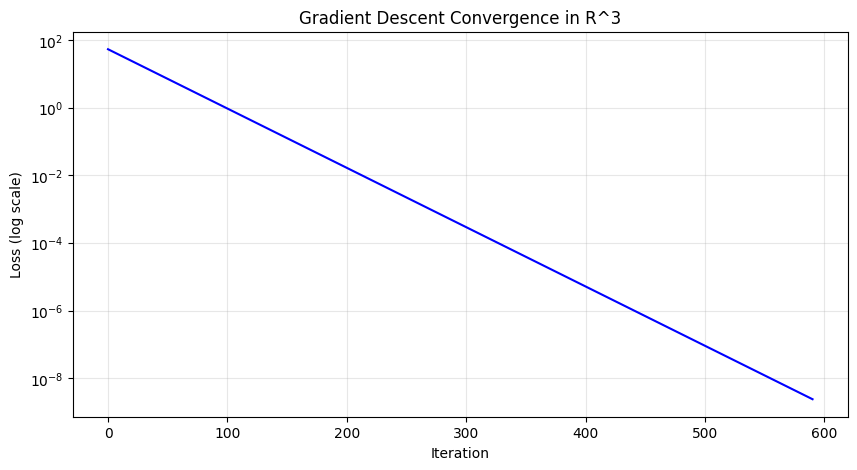

In [6]:
plt.figure(figsize=(10, 5))
plt.semilogy(losses, 'b-', linewidth=1.5)
plt.xlabel('Iteration')
plt.ylabel('Loss (log scale)')
plt.title('Gradient Descent Convergence in R^3')
plt.grid(True, alpha=0.3)
plt.show()